# Определение перспективного тарифа для телеком-компании

<b>Описание данных:</b><br>
Таблица <b>users</b> (информация о пользователях):
<li>user_id — уникальный идентификатор пользователя</li>
<li>first_name — имя пользователя</li>
<li>last_name — фамилия пользователя</li>
<li>age — возраст пользователя (годы)</li>
<li>reg_date — дата подключения тарифа (день, месяц, год)</li>
<li>churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)</li>
<li>city — город проживания пользователя</li>
<li>tarif — название тарифного плана</li><br>
Таблица <b>calls</b> (информация о звонках):
<li>id — уникальный номер звонка</li>
<li>call_date — дата звонка</li>
<li>duration — длительность звонка в минутах</li>
<li>user_id — идентификатор пользователя, сделавшего звонок</li><br>
Таблица <b>messages</b> (информация о сообщениях):
<li>id — уникальный номер сообщения</li>
<li>message_date — дата сообщения</li>
<li>user_id — идентификатор пользователя, отправившего сообщение</li><br>
Таблица <b>internet</b> (информация об интернет-сессиях):
<li>id — уникальный номер сессии</li>
<li>mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)</li>
<li>session_date — дата интернет-сессии</li>
<li>user_id — идентификатор пользователя</li><br>
Таблица <b>tariffs</b> (информация о тарифах):
<li>tariff_name — название тарифа</li>
<li>rub_monthly_fee — ежемесячная абонентская плата в рублях</li>
<li>minutes_included — количество минут разговора в месяц, включённых в абонентскую плату</li>
<li>messages_included — количество сообщений в месяц, включённых в абонентскую плату</li>
<li>mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)</li>
<li>rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)</li>
<li>rub_per_message — стоимость отправки сообщения сверх тарифного пакета</li>
<li>rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)</li>

## Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [3]:
data_users = pd.read_csv('/datasets/users.csv')
display(data_users)
data_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [4]:
data_calls = pd.read_csv('/datasets/calls.csv')
display(data_calls)
data_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
data_messages = pd.read_csv('/datasets/messages.csv')
display(data_messages)
data_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
data_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
display(data_internet)
data_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
display(data_tariffs)
data_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


<b>Вывод</b>

- В таблицах мы имеем лишь пропуски в таблице users в колонке 'churn_date'. Это нормально, т.к. эти пропуски значат, что человек еще пользуется тарифом.
- В таблицах, в которых имеются колонки с датами нужно заменить тип данных.
- В таблице internet имеется лишняя, дублирующая индексы, колонка, которую стоит удалить.
- Т.к. тарифы округляют минуты и гб в большую сторону до целого числа, то стоит окгруглить и изменить тип этих данных.

## Подготовка данных

### Таблица calls

In [8]:
data_calls.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [9]:
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y.%m.%d')

In [10]:
data_calls['duration'] = np.ceil(data_calls['duration']).astype('int')

In [11]:
data_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1,1499
202603,1499_216,2018-10-18,19,1499
202604,1499_217,2018-11-10,11,1499
202605,1499_218,2018-10-06,5,1499


### Таблица messages

In [12]:
data_messages.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [13]:
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y.%m.%d')

In [14]:
data_messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


### Таблица internet

In [15]:
data_internet.isna().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [16]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y.%m.%d')

In [17]:
data_internet['mb_used'] = np.ceil(data_internet['mb_used']).astype('int')

In [18]:
data_internet = data_internet.drop(columns = ['Unnamed: 0'], axis = 1)

In [19]:
data_internet

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000
...,...,...,...,...
149391,1499_152,319,2018-10-03,1499
149392,1499_153,491,2018-12-14,1499
149393,1499_154,0,2018-10-27,1499
149394,1499_155,1247,2018-11-26,1499


### Таблица users

In [20]:
data_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [21]:
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y.%m.%d')

In [22]:
data_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


<b>Вывод</b>

Мы обработали данные из таблиц, теперь можно переходить к расчетам.

### Подсчет звонков и минут по месяцам

In [23]:
data_calls['month'] = data_calls['call_date'].dt.month
data_messages['month'] = data_messages['message_date'].dt.month
data_internet['month'] = data_internet['session_date'].dt.month

In [24]:
calls_per_month = (
    pd.pivot_table(
        data_calls,
        index=['user_id', 'month'],
        values='duration',
        aggfunc=['count', 'sum'])
).reset_index()
calls_per_month.columns = calls_per_month.columns.droplevel(1)
calls_per_month = calls_per_month.rename(columns={'count': 'calls_count', 'sum': 'calls_sum'})
calls_per_month

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


### Подсчет сообщений по месяцам

In [25]:
message_per_month = (
    pd.pivot_table(
        data_messages,
        index=['user_id', 'month'],
        values='id',
        aggfunc='count')
).reset_index()
message_per_month = message_per_month.rename(columns={'id': 'message_count'})
message_per_month

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


### Объем трафика по месяцам

In [26]:
mb_per_month = (
    pd.pivot_table(
        data_internet,
        index=['user_id', 'month'],
        values='mb_used',
        aggfunc=['count', 'sum']
    )
).reset_index()
mb_per_month.columns = mb_per_month.columns.droplevel(1)
mb_per_month = mb_per_month.rename(columns={'count': 'mb_count', 'sum': 'mb_sum'})
mb_per_month

,user_id,month,mb_count,mb_sum
0,1000,5,5,2256
1,1000,6,49,23257
2,1000,7,29,14016
3,1000,8,29,14070
4,1000,9,27,14581
...,...,...,...,...
3198,1498,10,59,20604
3199,1499,9,5,1848
3200,1499,10,58,17809
3201,1499,11,49,17984


### Выручка с каждого пользователя

помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [27]:
data_free = [calls_per_month, message_per_month, mb_per_month]

total_use = reduce(lambda left,right: pd.merge(left,right,on=['user_id', 'month'], how='outer'), data_free)

total_use = pd.merge(data_users, total_use, how='outer')

total_use

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,mb_count,mb_sum
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,22.0,5.0,2256.0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,60.0,49.0,23257.0
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,75.0,29.0,14016.0
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,81.0,29.0,14070.0
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,57.0,27.0,14581.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,41.0,247.0,42.0,59.0,20604.0
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,9.0,70.0,11.0,5.0,1848.0
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,68.0,449.0,48.0,58.0,17809.0
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,74.0,612.0,59.0,49.0,17984.0


In [28]:
print(calls_per_month['calls_sum'].sum())
print(total_use['calls_sum'].sum())

1450301
1450301.0


In [30]:
def calls_included(row):
    if row['tariff'] == 'ultra':
        calls = 3000

    else:
        calls = 500

    return calls

total_use['calls_included'] = total_use.apply(calls_included, axis=1)

In [31]:
def messages_included(row):
    if row['tariff'] == 'ultra':
        messages = 1000

    else:
        messages = 50

    return messages

total_use['messages_included'] = total_use.apply(messages_included, axis=1)

In [32]:
def mb_included(row):
    if row['tariff'] == 'ultra':
        mb = 30720
        
    else:
        mb = 15360

    return mb

total_use['mb_included'] = total_use.apply(mb_included, axis=1)

In [33]:
def rub_per_minute(row):
    if row['tariff'] == 'ultra':
        rub = 1
    else:
        rub = 3
    return rub

total_use['rub_per_minute'] = total_use.apply(rub_per_minute, axis=1)

In [34]:
def rub_per_message(row):
    if row['tariff'] == 'ultra':
        rub = 1
    else:
        rub = 3
    return rub

total_use['rub_per_message'] = total_use.apply(rub_per_message, axis=1)

In [35]:
def rub_per_gb(row):
    if row['tariff'] == 'ultra':
        rub = 150
    else:
        rub = 200
    return rub

total_use['rub_per_gb'] = total_use.apply(rub_per_gb, axis=1)

In [36]:
def monthly_fee(row):
    if row['tariff'] == 'ultra':
        rub = 1950
    else:
        rub = 550
    return rub

total_use['monthly_fee'] = total_use.apply(monthly_fee, axis=1)

In [37]:
total_use

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,mb_count,mb_sum,calls_included,messages_included,mb_included,rub_per_minute,rub_per_message,rub_per_gb,monthly_fee
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,22.0,5.0,2256.0,3000,1000,30720,1,1,150,1950
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,60.0,49.0,23257.0,3000,1000,30720,1,1,150,1950
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,75.0,29.0,14016.0,3000,1000,30720,1,1,150,1950
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,81.0,29.0,14070.0,3000,1000,30720,1,1,150,1950
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,57.0,27.0,14581.0,3000,1000,30720,1,1,150,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,41.0,247.0,42.0,59.0,20604.0,500,50,15360,3,3,200,550
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,9.0,70.0,11.0,5.0,1848.0,500,50,15360,3,3,200,550
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,68.0,449.0,48.0,58.0,17809.0,500,50,15360,3,3,200,550
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,74.0,612.0,59.0,49.0,17984.0,500,50,15360,3,3,200,550


In [38]:
def revenue_counter(row):
    calls = row['calls_sum']
    messages = row['message_count']
    internet = row['mb_sum']
    free_limit_calls = row['calls_included']
    free_limit_messages = row['messages_included']
    free_limit_internet = row['mb_included']
    fee_limit_calls = row['rub_per_minute']
    fee_limit_messages = row['rub_per_message']
    fee_limit_internet = row['rub_per_gb']
    monthly_fee = row['monthly_fee']
    
    if calls > free_limit_calls:
        monthly_fee += (calls - free_limit_calls) * fee_limit_calls
 
    if internet > free_limit_internet:
         monthly_fee += ((internet - free_limit_internet) / 1024) * fee_limit_internet
 
    if messages > free_limit_messages:
        monthly_fee += (messages - free_limit_messages) * fee_limit_messages 
    
    return monthly_fee

In [39]:
total_use['monthly_use'] = total_use.apply(revenue_counter, axis=1)

In [40]:
total_use['gb_used'] = total_use['mb_sum'] / 1024
total_use

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,mb_count,mb_sum,calls_included,messages_included,mb_included,rub_per_minute,rub_per_message,rub_per_gb,monthly_fee,monthly_use,gb_used
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,22.0,5.0,2256.0,3000,1000,30720,1,1,150,1950,1950.000000,2.203125
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,60.0,49.0,23257.0,3000,1000,30720,1,1,150,1950,1950.000000,22.711914
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,75.0,29.0,14016.0,3000,1000,30720,1,1,150,1950,1950.000000,13.687500
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,81.0,29.0,14070.0,3000,1000,30720,1,1,150,1950,1950.000000,13.740234
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,57.0,27.0,14581.0,3000,1000,30720,1,1,150,1950,1950.000000,14.239258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,41.0,247.0,42.0,59.0,20604.0,500,50,15360,3,3,200,550,1574.218750,20.121094
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,9.0,70.0,11.0,5.0,1848.0,500,50,15360,3,3,200,550,550.000000,1.804688
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,68.0,449.0,48.0,58.0,17809.0,500,50,15360,3,3,200,550,1028.320312,17.391602
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,74.0,612.0,59.0,49.0,17984.0,500,50,15360,3,3,200,550,1425.500000,17.562500


<b>Вывод</b>

Мы собрали одну большую таблицу со всеми нужными для расчетов данными. Посчитали сообщения, звонки и трафик для каждого пользователя в месяц, а потом посчитали выручку, учитывая тариф.

## Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. 
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- Постройте гистограммы. Опишите распределения.

In [41]:
smart_tariff = total_use[total_use['tariff'] == 'smart']
ultra_tariff = total_use[total_use['tariff'] == 'ultra']

In [42]:
smart_tariff

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,mb_count,mb_sum,calls_included,messages_included,mb_included,rub_per_minute,rub_per_message,rub_per_gb,monthly_fee,monthly_use,gb_used
8,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11.0,59.0,430.0,NaN,55.0,18452.0,500,50,15360,3,3,200,550,1153.906250,18.019531
9,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,12.0,63.0,414.0,NaN,41.0,14053.0,500,50,15360,3,3,200,550,550.000000,13.723633
10,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6.0,15.0,117.0,4.0,34.0,10871.0,500,50,15360,3,3,200,550,550.000000,10.616211
11,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,7.0,26.0,214.0,11.0,58.0,17601.0,500,50,15360,3,3,200,550,987.695312,17.188477
12,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,8.0,42.0,289.0,13.0,60.0,20347.0,500,50,15360,3,3,200,550,1524.023438,19.870117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10.0,41.0,247.0,42.0,59.0,20604.0,500,50,15360,3,3,200,550,1574.218750,20.121094
3212,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,9.0,9.0,70.0,11.0,5.0,1848.0,500,50,15360,3,3,200,550,550.000000,1.804688
3213,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,10.0,68.0,449.0,48.0,58.0,17809.0,500,50,15360,3,3,200,550,1028.320312,17.391602
3214,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart,11.0,74.0,612.0,59.0,49.0,17984.0,500,50,15360,3,3,200,550,1425.500000,17.562500


In [43]:
ultra_tariff

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,calls_count,calls_sum,message_count,mb_count,mb_sum,calls_included,messages_included,mb_included,rub_per_minute,rub_per_message,rub_per_gb,monthly_fee,monthly_use,gb_used
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,22.0,159.0,22.0,5.0,2256.0,3000,1000,30720,1,1,150,1950,1950.000000,2.203125
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,43.0,172.0,60.0,49.0,23257.0,3000,1000,30720,1,1,150,1950,1950.000000,22.711914
2,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,47.0,340.0,75.0,29.0,14016.0,3000,1000,30720,1,1,150,1950,1950.000000,13.687500
3,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,52.0,408.0,81.0,29.0,14070.0,3000,1000,30720,1,1,150,1950,1950.000000,13.740234
4,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,58.0,466.0,57.0,27.0,14581.0,3000,1000,30720,1,1,150,1950,1950.000000,14.239258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,8.0,17.0,92.0,13.0,4.0,2616.0,3000,1000,30720,1,1,150,1950,1950.000000,2.554688
3189,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,9.0,112.0,813.0,82.0,69.0,33105.0,3000,1000,30720,1,1,150,1950,2299.365234,32.329102
3190,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,10.0,152.0,1030.0,82.0,63.0,29393.0,3000,1000,30720,1,1,150,1950,1950.000000,28.704102
3191,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,11.0,129.0,954.0,79.0,71.0,38972.0,3000,1000,30720,1,1,150,1950,3158.789062,38.058594


### Среднее количество

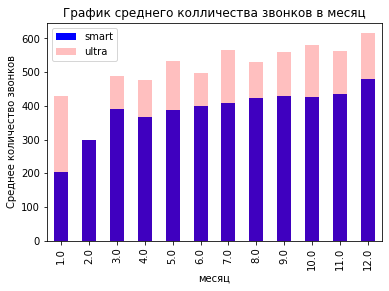

In [44]:
smart_calls = smart_tariff.pivot_table(index='month', values='calls_sum', aggfunc='mean')
ax = smart_calls.plot(kind='bar', y='calls_sum', color='blue')
plt.title('График среднего колличества звонков в месяц')
plt.xlabel('месяц')
plt.ylabel('Средняя длительность звонка')

ultra_calls = ultra_tariff.pivot_table(index='month', values='calls_sum', aggfunc='mean')
ultra_calls.plot(kind='bar', y='calls_sum', ax=ax, color='red', alpha=0.25)
ax.legend(['smart', 'ultra'])
plt.xlabel('месяц')
plt.ylabel('Среднее количество звонков');

<b>Вывод</b>

Пользователи тарифов SMART и ULTRA в среднем укладываются в лимит доступных им минут в месяц.<br>
- На протяжении всего года кроме 1 и 2 месяца пользователи тарифа SMART исчерпывают почти весь свой лимит, таким образом, используют его по максимуму.
- Пользователи тарифа ULTRA лишь чуть чуть выходят за рамки тарифа SMART, а в некоторых месяцах даже не превышают и его. (1, 2)

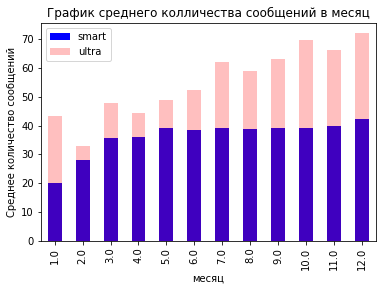

In [45]:
smart_message = smart_tariff.pivot_table(index='month', values='message_count', aggfunc='mean')
ax = smart_message.plot(kind='bar', y='message_count', color='blue')
plt.title('График среднего колличества сообщений в месяц')
plt.xlabel('месяц')
plt.ylabel('Среднее количество сообщений')

ultra_message = ultra_tariff.pivot_table(index='month', values='message_count', aggfunc='mean')
ultra_message.plot(kind='bar', y='message_count', ax=ax, color='red', alpha=0.25)
ax.legend(['smart', 'ultra'])
plt.xlabel('месяц')
plt.ylabel('Среднее количество сообщений');

<b>Вывод</b>

Тоже самое касается и сообщений. Пользователи тарифов SMART и ULTRA не выходят за рамки. <br>
- Как и на прошлом графике, пользователи тарифа SMART используют лимиты тарифа по максимуму, не догоняя лишь в 1 и 2 месяце.
- Пользователи тарифа ULTRA лишь немного выходят за рамки 50 сообщений в месяц кроме месяцов 1, 2, 4.

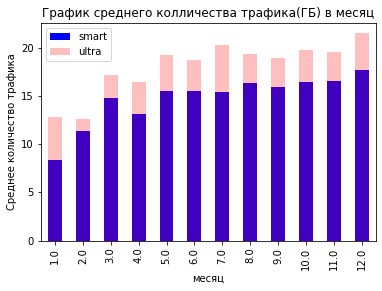

In [46]:
smart_gb = smart_tariff.pivot_table(index='month', values=('gb_used'), aggfunc='mean')
ax = smart_gb.plot(kind='bar', y='gb_used', color='blue')
plt.title('График среднего колличества трафика(ГБ) в месяц')
plt.xlabel('месяц')
plt.ylabel('Среднее количество трафика')

ultra_gb = ultra_tariff.pivot_table(index='month', values='gb_used', aggfunc='mean')
ultra_gb.plot(kind='bar', y='gb_used', ax=ax, color='red', alpha=0.25)
ax.legend(['smart', 'ultra'])
plt.xlabel('месяц')
plt.ylabel('Среднее количество трафика');

<b>Вывод</b>

На этом графике пользователи тарифа SMART уже иногда выходят за рамки своего тарифа, в то время как пользователи ULTRA - нет.
<br><br>
У меня появляется вопрос. Если взять пиковые значения тарифа ULTRA и применить его к тарифу SMART. Будет ли выгодно пользоваться тарифом ULTRA или стоит взять тариф SMART и доплатить за лишние минуты, смс и интернет?

### Выгода пользователя

In [47]:
calls_max = ultra_calls['calls_sum'].max()
message_max = ultra_message['message_count'].max()
gb_max = ultra_gb['gb_used'].max()

ultra_max = pd.DataFrame({'Звонки(max)': [calls_max],
                          'Сообщения(max)': [message_max],
                          'ГБ(max)': [gb_max]
                         })

ultra_max.round()

,Звонки(max),Сообщения(max),ГБ(max)
0,615.0,72.0,21.0


Отсюда имеем сверху:
- 140 минут разговоров
- 23 сообщения
- 7 ГБ трафика

In [48]:
print(140 * 3 + 23 * 3 + 7 * 200)

1889


При взятых пиковых значениях тариф действительно получается выгоден на 611 рублей, что, я думаю, вполне нормально и логично. А при средних ?

In [49]:
calls_mean = ultra_calls['calls_sum'].mean()
message_mean = ultra_message['message_count'].mean()
gb_mean = ultra_gb['gb_used'].mean()

ultra_mean = pd.DataFrame({'Звонки(max)': [calls_mean],
                          'Сообщения(max)': [message_mean],
                          'ГБ(max)': [gb_mean]
                         })

ultra_mean.round()

,Звонки(max),Сообщения(max),ГБ(max)
0,511.0,55.0,18.0


Отсюда имеем сверху:
- 32 минуты разговоров
- 6 сообщений
- 3 ГБ трафика

In [50]:
print(32 * 3 + 6 * 3 + 3 * 200)

714


Что получается на 686 руб. дешевле, чем брать тариф ULTRA.

<b>Вывод</b>

В среднем пользователи тарифа ULTRA не используют свои ресурсы на максимум и при этом переплачивают сумму, равную целому тарифу SMART и небольшой горкой.

### Дисперсия

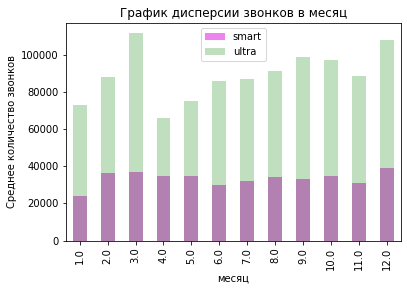

In [51]:
smart_calls = smart_tariff.pivot_table(index='month', values='calls_sum', aggfunc='var')
ax = smart_calls.plot(kind='bar', y='calls_sum', color='violet')
plt.title('График дисперсии звонков в месяц')
plt.xlabel('месяц')
plt.ylabel('Средняя длительность звонка')

ultra_calls = ultra_tariff.pivot_table(index='month', values='calls_sum', aggfunc='var')
ultra_calls.plot(kind='bar', y='calls_sum', ax=ax, color='green', alpha=0.25)
ax.legend(['smart', 'ultra'])
plt.xlabel('месяц')
plt.ylabel('Среднее количество звонков');

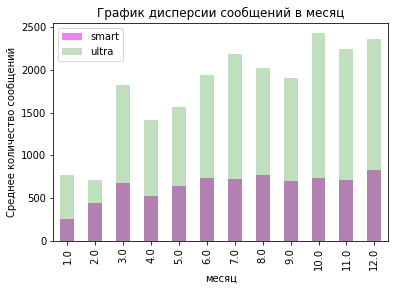

In [52]:
smart_message = smart_tariff.pivot_table(index='month', values='message_count', aggfunc='var')
ax = smart_message.plot(kind='bar', y='message_count', color='violet')
plt.title('График дисперсии сообщений в месяц')
plt.xlabel('месяц')
plt.ylabel('Среднее количество сообщений')

ultra_message = ultra_tariff.pivot_table(index='month', values='message_count', aggfunc='var')
ultra_message.plot(kind='bar', y='message_count', ax=ax, color='green', alpha=0.25)
ax.legend(['smart', 'ultra'])
plt.xlabel('месяц')
plt.ylabel('Среднее количество сообщений');

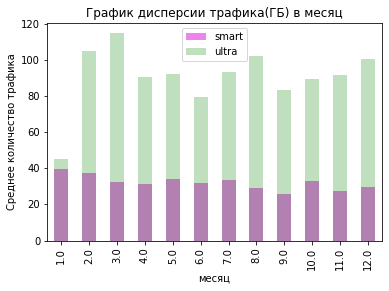

In [53]:
smart_gb = smart_tariff.pivot_table(index='month', values=('gb_used'), aggfunc='var')
ax = smart_gb.plot(kind='bar', y='gb_used', color='violet')
plt.title('График дисперсии трафика(ГБ) в месяц')
plt.xlabel('месяц')
plt.ylabel('Среднее количество трафика')

ultra_gb = ultra_tariff.pivot_table(index='month', values='gb_used', aggfunc='var')
ultra_gb.plot(kind='bar', y='gb_used', ax=ax, color='green', alpha=0.25)
ax.legend(['smart', 'ultra'])
plt.xlabel('месяц')
plt.ylabel('Среднее количество трафика');

### Стандартное отклонение

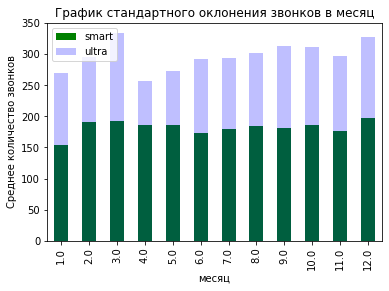

In [54]:
smart_calls = smart_tariff.pivot_table(index='month', values='calls_sum', aggfunc='std')
ax = smart_calls.plot(kind='bar', y='calls_sum', color='green')
plt.title('График стандартного оклонения звонков в месяц')
plt.xlabel('месяц')
plt.ylabel('Средняя длительность звонка')

ultra_calls = ultra_tariff.pivot_table(index='month', values='calls_sum', aggfunc='std')
ultra_calls.plot(kind='bar', y='calls_sum', ax=ax, color='blue', alpha=0.25)
ax.legend(['smart', 'ultra'])
plt.xlabel('месяц')
plt.ylabel('Среднее количество звонков');

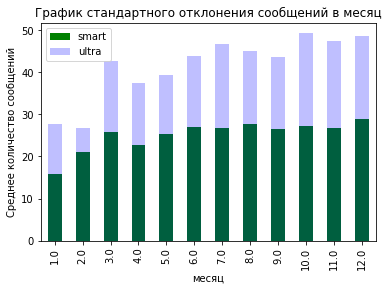

In [55]:
smart_message = smart_tariff.pivot_table(index='month', values='message_count', aggfunc='std')
ax = smart_message.plot(kind='bar', y='message_count', color='green')
plt.title('График стандартного отклонения сообщений в месяц')
plt.xlabel('месяц')
plt.ylabel('Среднее количество сообщений')

ultra_message = ultra_tariff.pivot_table(index='month', values='message_count', aggfunc='std')
ultra_message.plot(kind='bar', y='message_count', ax=ax, color='blue', alpha=0.25)
ax.legend(['smart', 'ultra'])
plt.xlabel('месяц')
plt.ylabel('Среднее количество сообщений');

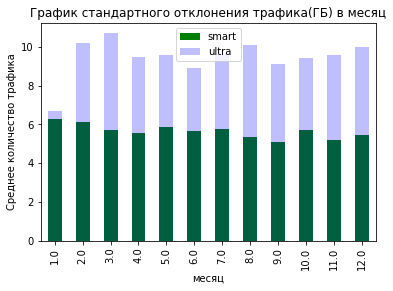

In [56]:
smart_gb = smart_tariff.pivot_table(index='month', values=('gb_used'), aggfunc='std')
ax = smart_gb.plot(kind='bar', y='gb_used', color='green')
plt.title('График стандартного отклонения трафика(ГБ) в месяц')
plt.xlabel('месяц')
plt.ylabel('Среднее количество трафика')

ultra_gb = ultra_tariff.pivot_table(index='month', values='gb_used', aggfunc='std')
ultra_gb.plot(kind='bar', y='gb_used', ax=ax, color='blue', alpha=0.25)
ax.legend(['smart', 'ultra'])
plt.xlabel('месяц')
plt.ylabel('Среднее количество трафика');

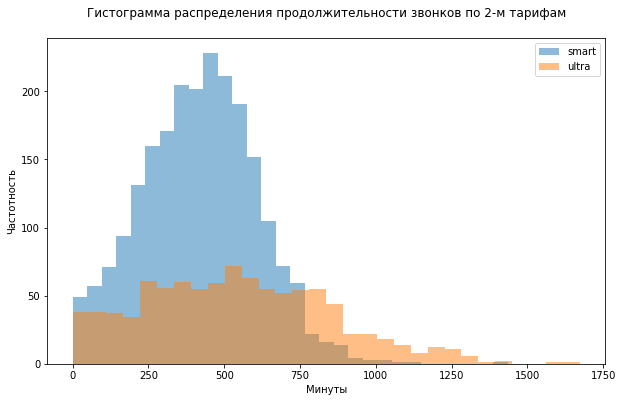

In [57]:
plt.figure(figsize=(10, 6))
total_use['calls_sum'][total_use['tariff'] == 'smart'].plot(kind='hist', alpha=0.5, bins=30)
total_use['calls_sum'][total_use['tariff'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Гистограмма распределения продолжительности звонков по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra']);

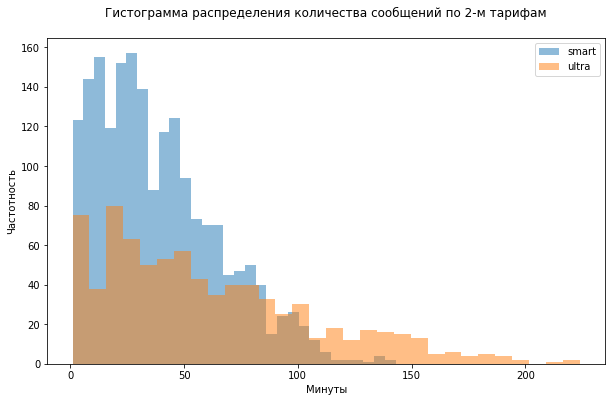

In [58]:
plt.figure(figsize=(10, 6))
total_use['message_count'][total_use['tariff'] == 'smart'].plot(kind='hist', alpha=0.5, bins=30)
total_use['message_count'][total_use['tariff'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Гистограмма распределения количества сообщений по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra']);

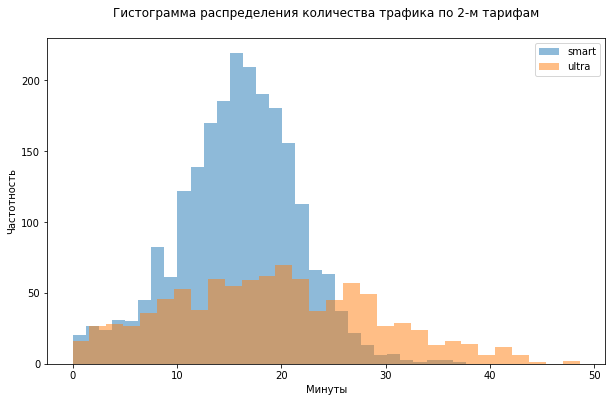

In [59]:
plt.figure(figsize=(10, 6))
total_use['gb_used'][total_use['tariff'] == 'smart'].plot(kind='hist', alpha=0.5, bins=30)
total_use['gb_used'][total_use['tariff'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('Гистограмма распределения количества трафика по 2-м тарифам'+ "\n")
plt.xlabel('Минуты')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra']);

<b>Вывод</b>

Пользователи тарифов в среднем почти не выходят за рамки, предложенные тарифом, кроме использования трафика для пользователей SMART. В остальном, пользователи SMART используют все ресурсы своего тарифа, когда как пользователи ULTRA чуть больше половины.

## Проверка гипотезы

Т.к. мы уже имеем гипотезы,
нам остается определить, к какой гипотезе они подходят. Нулевой или альтернативной.<br>
Нулевая гипотеза формируется со знаком равно, альтернативная ему противоречит.

<b>Нулевая гипотеза:</b> Средняя выручка с пользователей тарифов "ULTRA" и "SMART" одинковые(=).<br>
<b>Альтернативная гипотеза:</b> Средняя выручка с пользователей тарифов "ULTRA" и "SMART" различаются(!=).

In [60]:
alpha = .01

In [61]:
sample_smart = total_use.query('tariff == "smart"')['monthly_use']
sample_ultra = total_use.query('tariff == "ultra"')['monthly_use']
 
results = stats.ttest_ind(sample_smart, sample_ultra, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.665639404941842e-296
Отвергаем нулевую гипотезу


<b>Вывод</b>

Так как значение pvalue ниже порогового значения, то отвергаем данную гипотезу и принимаем альтернативную.<br>
Средняя выручка пользователей SMART и ULTRA различаются.

<b>Нулевая гипотеза:</b> Средняя выручка пользователей Москвы и других регионов одинаковая(=).<br>
<b>Альтернативная гипотеза:</b> Средняя выручка пользователей из Москвы отличается(!=) от выручки пользователей из других регионов.

In [62]:
sample_moscow = total_use.query('city == "Москва"')['monthly_use']
sample_other_city = total_use.query('city != "Москва"')['monthly_use']

results = stats.ttest_ind(sample_moscow, sample_other_city, equal_var=False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.4517561756356935
Не получилось отвергнуть нулевую гипотезу


<b>Вывод</b>

Значение pvalue сильно выше порогового значения. Следовательно, не получается отвергнуть нулевую гипотезу. Значит, остаемся при ней.<br>
Средняя выручка пользователей Москвы и других регионов одинаковая.

## Общий вывод

<b>Данные</b><br>
В таблице были обработаны данные. А именно:
- Изменены типы данных
- Удалена лишняя колонка
- Округлены значения в некоторых колонках

<b>Подготовлены данные для дальнейших вычислений</b><br>
Были подсчитаны звонки, сообщения и использование трафика для каждого пользователя по месяцам.<br>
Была создана общая таблица для последующего анализа данных, которая собрана из всех имеющихся таблиц изначально и были добавлены новые данные путем вычислений, а именно:
- лимиты каждого тарифного плана
- стоимость услуг сверх тарифного пакета
- выручка с каждого пользователя в месяц
- использование минут, смс и трафика для каждого пользователя в месяц

<b>Анализ данных</b><br>
Мы сравнили тарифы между собой и выяснили, сколько минут, смс и трафика требуется пользователям в месяц. Пришли к выводу, что пользователи тарифа SMART используют возможности тарифа по максимуму, когда как пользователи тарифа ULTRA используют чуть больше половины возможностей.<br>
Исходя из такого вывода так же вычислили, на сколько выгоден тариф ULTRA при использовании его не на все 100% и выгоден ли вообще.

<b>Проверка гипотез</b><br>
По имеющимся данным составили и проверили гипотезы.<br>
Получилось, что:
- Средняя выручка с пользователей тарифов "ULTRA" и "SMART" различаются
- Средняя выручка пользователей Москвы и других регионов одинаковая

<b>Вывод</b><br>
По изученным данным можно сказать, что тариф SMART смотриться лучше. Он дешевле и выгоднее даже для тех, кто использует чуть больше минут, смс и трафика. Так же пользователи этого тарифа почти всегда израсходуют все опции до конца, когда как пользователи тарифа ULTRA почти никогда.